In [2]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# Cargar el modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
efficientnet = torch.load('Models/efficientnet_b0_model.pkl', map_location=torch.device(device))
efficientnet.eval()  # Poner el modelo en modo de evaluación

/tmp/ipykernel_1878/3930052827.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  efficientnet = torch.load('Models/efficientnet_b0_model.pkl', map_location=torch.device(de

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
# Cargar los nombres de las clases del dataset CIFAR-100
cifar100_classes = datasets.CIFAR100(root='./data', train=False, download=True).classes

Files already downloaded and verified


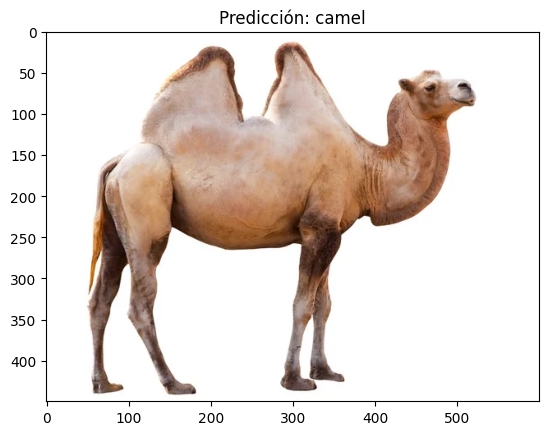

In [6]:
# Cargar la imagen de prueba y aplicarle las mismas transformaciones usadas para entrenar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
])

# Cargar una imagen de prueba desde un archivo PNG
img = Image.open('test_images/web_test/1.png')
img_transformed = transform(img).unsqueeze(0)  # Aplicar las transformaciones y añadir una dimensión para el batch
# 
# Mover el modelo y la imagen a la GPU si está disponible
efficientnet = efficientnet.to(device)
img_transformed = img_transformed.to(device)

# Hacer la predicción
efficientnet.eval()  # Asegurarse de que el modelo esté en modo evaluación
with torch.no_grad():
    output = efficientnet(img_transformed)
    _, predicted_class = torch.max(output, 1)

# Obtener el nombre de la clase predicha
predicted_class_name = cifar100_classes[predicted_class.item()]

# Mostrar la imagen de prueba con el nombre de la clase predicha
plt.imshow(img)
plt.title(f'Predicción: {predicted_class_name}')
plt.show()
